# Analysing Star Wars Survey

In [20]:
# Read the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")
star_wars.columns # So many things are unamed.
star_wars.head(10) # So many NaN values

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire 

## Cleaning Data

In [21]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [22]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [23]:
# Feature Engineering : Map to boolean values for easier computations.
yes_no = {"Yes":True, "No":False}
columns = ["Have you seen any of the 6 films in the Star Wars franchise?","Do you consider yourself to be a fan of the Star Wars film franchise?"]
for column in columns:
    star_wars[column] = star_wars[column].map(yes_no)

star_wars.head()
    

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [24]:
map_all = {"Star Wars: Episode I  The Phantom Menace": True, "Star Wars: Episode II  Attack of the Clones":True,"Star Wars: Episode III  Revenge of the Sith":True,"Star Wars: Episode IV  A New Hope":True,"Star Wars: Episode V The Empire Strikes Back":True,"Star Wars: Episode VI Return of the Jedi":True,np.nan:False}
map_rename_column = {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1','Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'}
for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(map_all)
star_wars = star_wars.rename(columns = map_rename_column)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [25]:
#Convert the columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
sw_columns = star_wars.columns[9:15]
map_sw = {}
values = ['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']
for column, value in zip(sw_columns,values):
    map_sw[column] = value
star_wars = star_wars.rename(columns = map_sw)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3292879998,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the highest ranked movie

In [26]:
sw_c = star_wars.columns[9:15]
means = []
for column in sw_c:
    means.append(star_wars[column].mean())

In [27]:
means

[3.7329341317365268,
 4.0873205741626792,
 4.341317365269461,
 3.2727272727272729,
 2.513157894736842,
 3.0478468899521531]

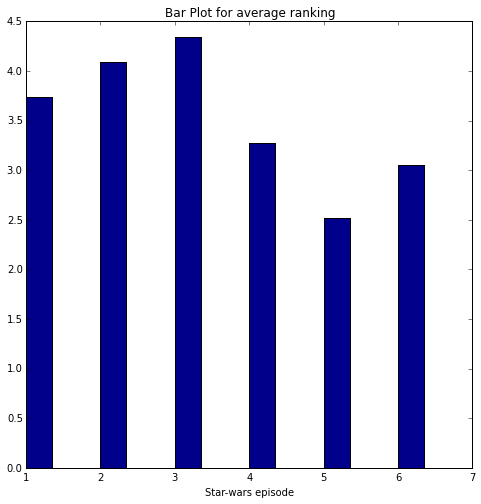

In [28]:
#Create a bar chart
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
index = np.arange(1,7)
width = 0.35
ax1.bar(index, means,width,color = 'darkblue')
ax1.set_title("Bar Plot for average ranking")
ax1.set_xlabel("Star-wars episode")
plt.show()



Looking at the bar chart it appears that Star Wars episode 5 was the favourite of all. Then Episode 2: and least was the episode 3. (lowest ranking is better. scale was 1-6. 1 being the best, 6 being the worst.)

## Most seen movie

In [29]:
sw_c = star_wars.columns[3:9]
sums = []
for column in sw_c:
    sums.append(star_wars[column].sum())
sums

[673, 571, 550, 607, 758, 738]

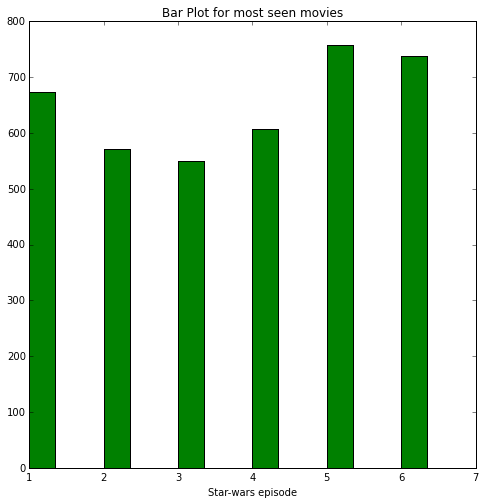

In [30]:
#Create a bar chart
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
index = np.arange(1,7)
width = 0.35
ax1.bar(index, sums,width,color = 'green')
ax1.set_title("Bar Plot for most seen movies")
ax1.set_xlabel("Star-wars episode")
plt.show()

Not surprisingly, Episode 5 was the most seen movie. Followed by Episode 6 and least was episode 3.

## Binary Segmentation of dataset : Gender

In [31]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Highest ranked movie : Males

males_c = males.columns[9:15]
means = []
for column in males_c:
    means.append(males[column].mean())
means

[4.0378250591016549,
 4.2245862884160754,
 4.2748815165876781,
 2.9976359338061465,
 2.458628841607565,
 3.0023640661938535]

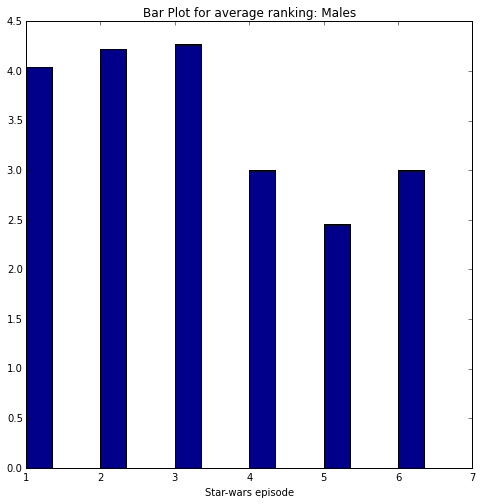

In [32]:
#Create a bar chart
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
index = np.arange(1,7)
width = 0.35
ax1.bar(index, means,width,color = 'darkblue')
ax1.set_title("Bar Plot for average ranking: Males")
ax1.set_xlabel("Star-wars episode")
plt.show()



Episode 5 was the most highly ranked movie among Males and Episode 3 was the least.

In [33]:
# Highest ranked movie : Females

females_c = females.columns[9:15]
means = []
for column in females_c:
    means.append(females[column].mean())
means

[3.4292929292929295,
 3.9546599496221662,
 4.4181360201511337,
 3.5440806045340052,
 2.5692695214105794,
 3.0780856423173804]

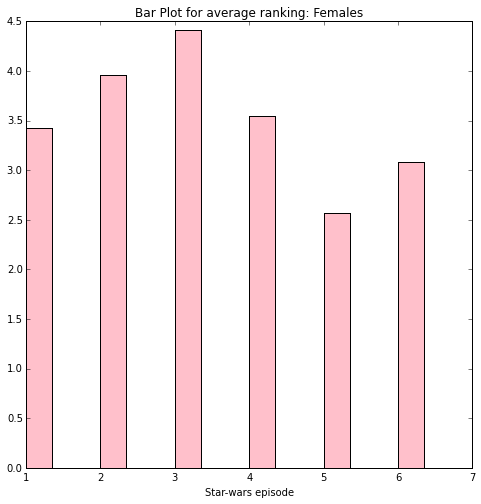

In [34]:
#Create a bar chart
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
index = np.arange(1,7)
width = 0.35
ax1.bar(index, means,width,color = 'pink')
ax1.set_title("Bar Plot for average ranking: Females")
ax1.set_xlabel("Star-wars episode")
plt.show()



In [35]:
# Most Seen Movie : Males

males_c = males.columns[3:9]
sums = []
for column in males_c:
    sums.append(males[column].sum())
sums

[361, 323, 317, 342, 392, 387]

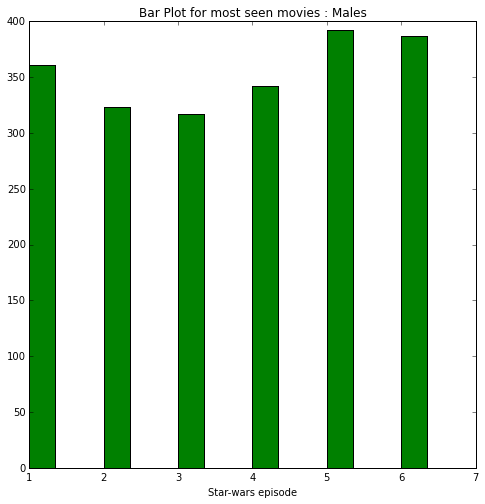

In [36]:
# A barchart

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
index = np.arange(1,7)
width = 0.35
ax1.bar(index, sums,width,color = 'green')
ax1.set_title("Bar Plot for most seen movies : Males")
ax1.set_xlabel("Star-wars episode")
plt.show()

Most seen movie among males is Episode 5 and least is episode 3.

In [37]:
# Most Seen Movie : Females

females_c = females.columns[3:9]
sums = []
for column in females_c:
    sums.append(females[column].sum())

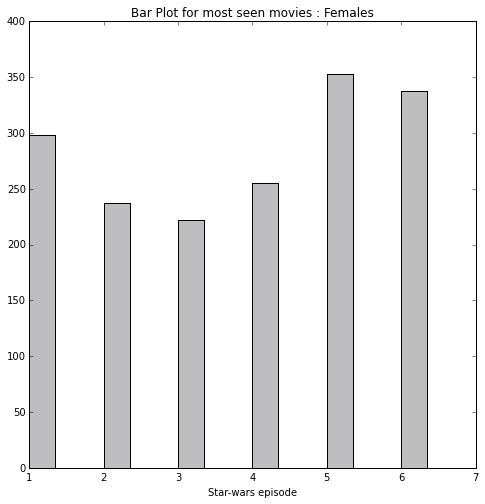

In [75]:
# A barchart

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
index = np.arange(1,7)
width = 0.35
ax1.bar(index, sums,width,color = '#bebec1')
ax1.set_title("Bar Plot for most seen movies : Females")
ax1.set_xlabel("Star-wars episode")
plt.show()

Most seen movie among Females was episode 5 and least was episode 3

### Create a reusable function for barchart

In [56]:
def get_subset_aggregation(function, df, range1, range2):
    df_c = df.columns[3:9]
    function_list = []
    for column in df_c:
        function_list.append(function(df[column]))
    return(function_list)

def plot_barchart(aggregate_list,title_str, xlabel_str, c):
    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(1,1,1)
    index = np.arange(1,7)
    width = 0.35
    ax1.bar(index, aggregate_list,width,color = c)
    ax1.set_title(title_str)
    ax1.set_xlabel(xlabel_str)
    plt.show()

## Binary Segmentation of dataset : Education

In [41]:
set(star_wars["Education"].values) # Find the unique values in column.

{nan,
 'Bachelor degree',
 'Some college or Associate degree',
 'Less than high school degree',
 'Graduate degree',
 'High school degree'}

In [58]:
bachelor_degree = star_wars[star_wars["Education"] == "Bachelor degree"]
associate_degree = star_wars[star_wars["Education"] == "Some college or Associate degree"]
less_high_school_degree = star_wars[star_wars["Education"] == "Less than high school degree"]
graduate_degree = star_wars[star_wars["Education"] == "Graduate degree"]
high_school_degree = star_wars[star_wars["Education"] == "High school degree"]

[0.64174454828660432, 0.52959501557632394, 0.50778816199376942, 0.60747663551401865, 0.7570093457943925, 0.7289719626168224]


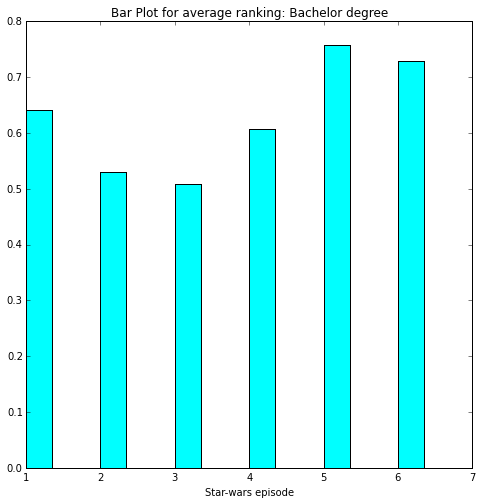

In [61]:
# Highest ranked movie : Bachelor degree

means = get_subset_aggregation(pd.Series.mean,bachelor_degree,9,15)
print(means)
plot_barchart(means,"Bar Plot for average ranking: Bachelor degree","Star-wars episode","cyan")

[0.64329268292682928, 0.56707317073170727, 0.55792682926829273, 0.54878048780487809, 0.69207317073170727, 0.67987804878048785]


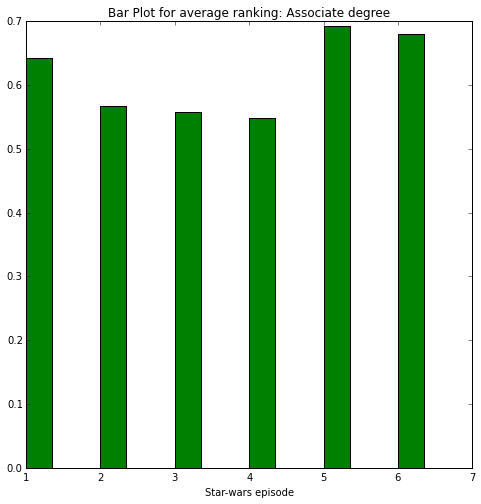

In [62]:
# Highest ranked movie : Associate degree

means = get_subset_aggregation(pd.Series.mean,associate_degree,9,15)
print(means)
plot_barchart(means,"Bar Plot for average ranking: Associate degree","Star-wars episode","green")

This graph shows that Episode 4 was the highest ranked among Associate degree student and episode 5 being the least.

[0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


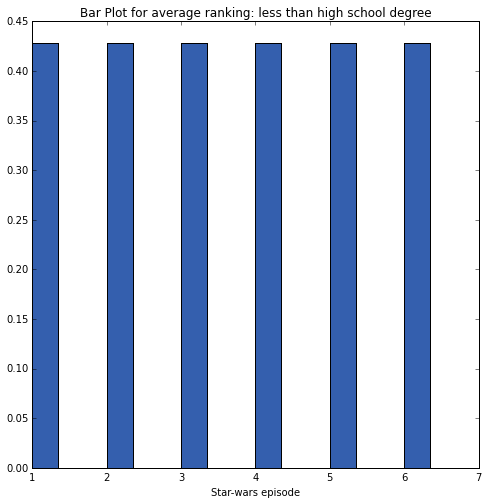

In [74]:
# Highest ranked movie : Associate degree

means = get_subset_aggregation(pd.Series.mean,less_high_school_degree,9,15)
print(means)
plot_barchart(means,"Bar Plot for average ranking: less than high school degree","Star-wars episode","#345fae")

Same!

[0.65090909090909088, 0.54181818181818187, 0.50545454545454549, 0.59272727272727277, 0.75272727272727269, 0.73090909090909095]


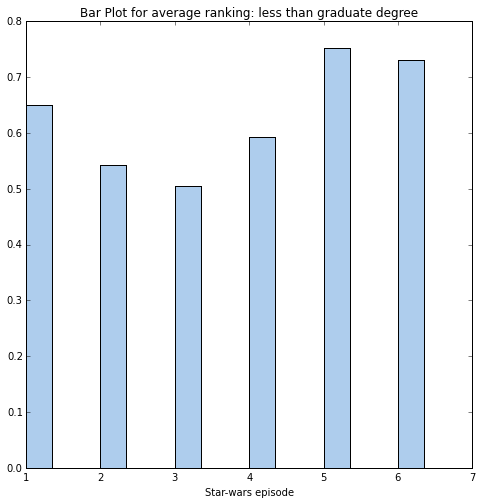

In [71]:
# Highest ranked movie : Graduate degree

means = get_subset_aggregation(pd.Series.mean,graduate_degree,9,15)
print(means)
plot_barchart(means,"Bar Plot for average ranking: less than graduate degree","Star-wars episode","#aecded")

[0.54285714285714282, 0.45714285714285713, 0.45714285714285713, 0.50476190476190474, 0.580952380952381, 0.5714285714285714]


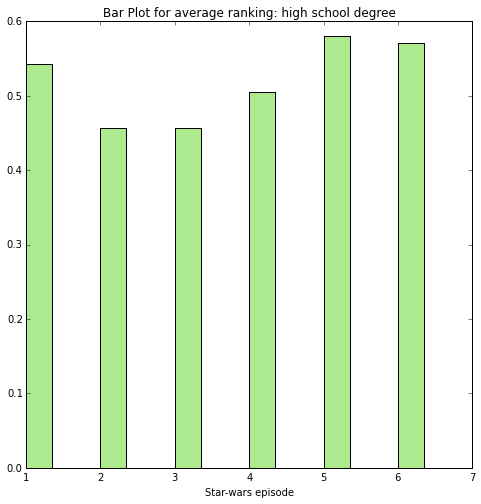

In [73]:
# Highest ranked movie : Graduate degree

means = get_subset_aggregation(pd.Series.mean,high_school_degree,9,15)
print(means)
plot_barchart(means,"Bar Plot for average ranking: high school degree","Star-wars episode","#ace98f")